# Практическая работа 2

## Задание 1
Выбран набор: Диагностика заболеваний по аудиосигналам [Parkinson's Disease Classification](https://archive.ics.uci.edu/dataset/470/parkinson+s+disease+classification)

In [2]:
import np as np
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


## Задание 2

 - Построить модель DecisionTreeClassifier
 - Исследовать влияние гиперпараметров алгоритма на качество классификации:
   - число уровней (max_depth)
   - минимальное число объектов узла (min_samples_split)
 - Для выбранной модели построить структуру дерева решений, указать показатели, участвующие в структуре дерева.

Training number:  567
Testing number:  189

   depth  test_score
0     2    0.783069
0     3    0.788360
0     4    0.798942
0     5    0.798942
0     6    0.809524
0     7    0.793651
0     8    0.767196
0     9    0.756614 


   min_samples_split  test_score
0                 6    0.751323
0                 9    0.746032
0                12    0.746032
0                15    0.756614
0                18    0.746032
0                21    0.761905
0                24    0.761905
0                27    0.777778 

Features:  Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_27', 'tqwt_kurtosisValue_dec_28',
       'tqwt_kurtosisValue_dec_29', 'tqwt_kurtosisValue_dec_30',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_32',
       'tqwt_kurtosisValue_dec_33', 'tqwt_kurtosisValue_dec_34',
       'tqwt_kurtosisValue_dec_35', 'tqwt_kurtosisValue_

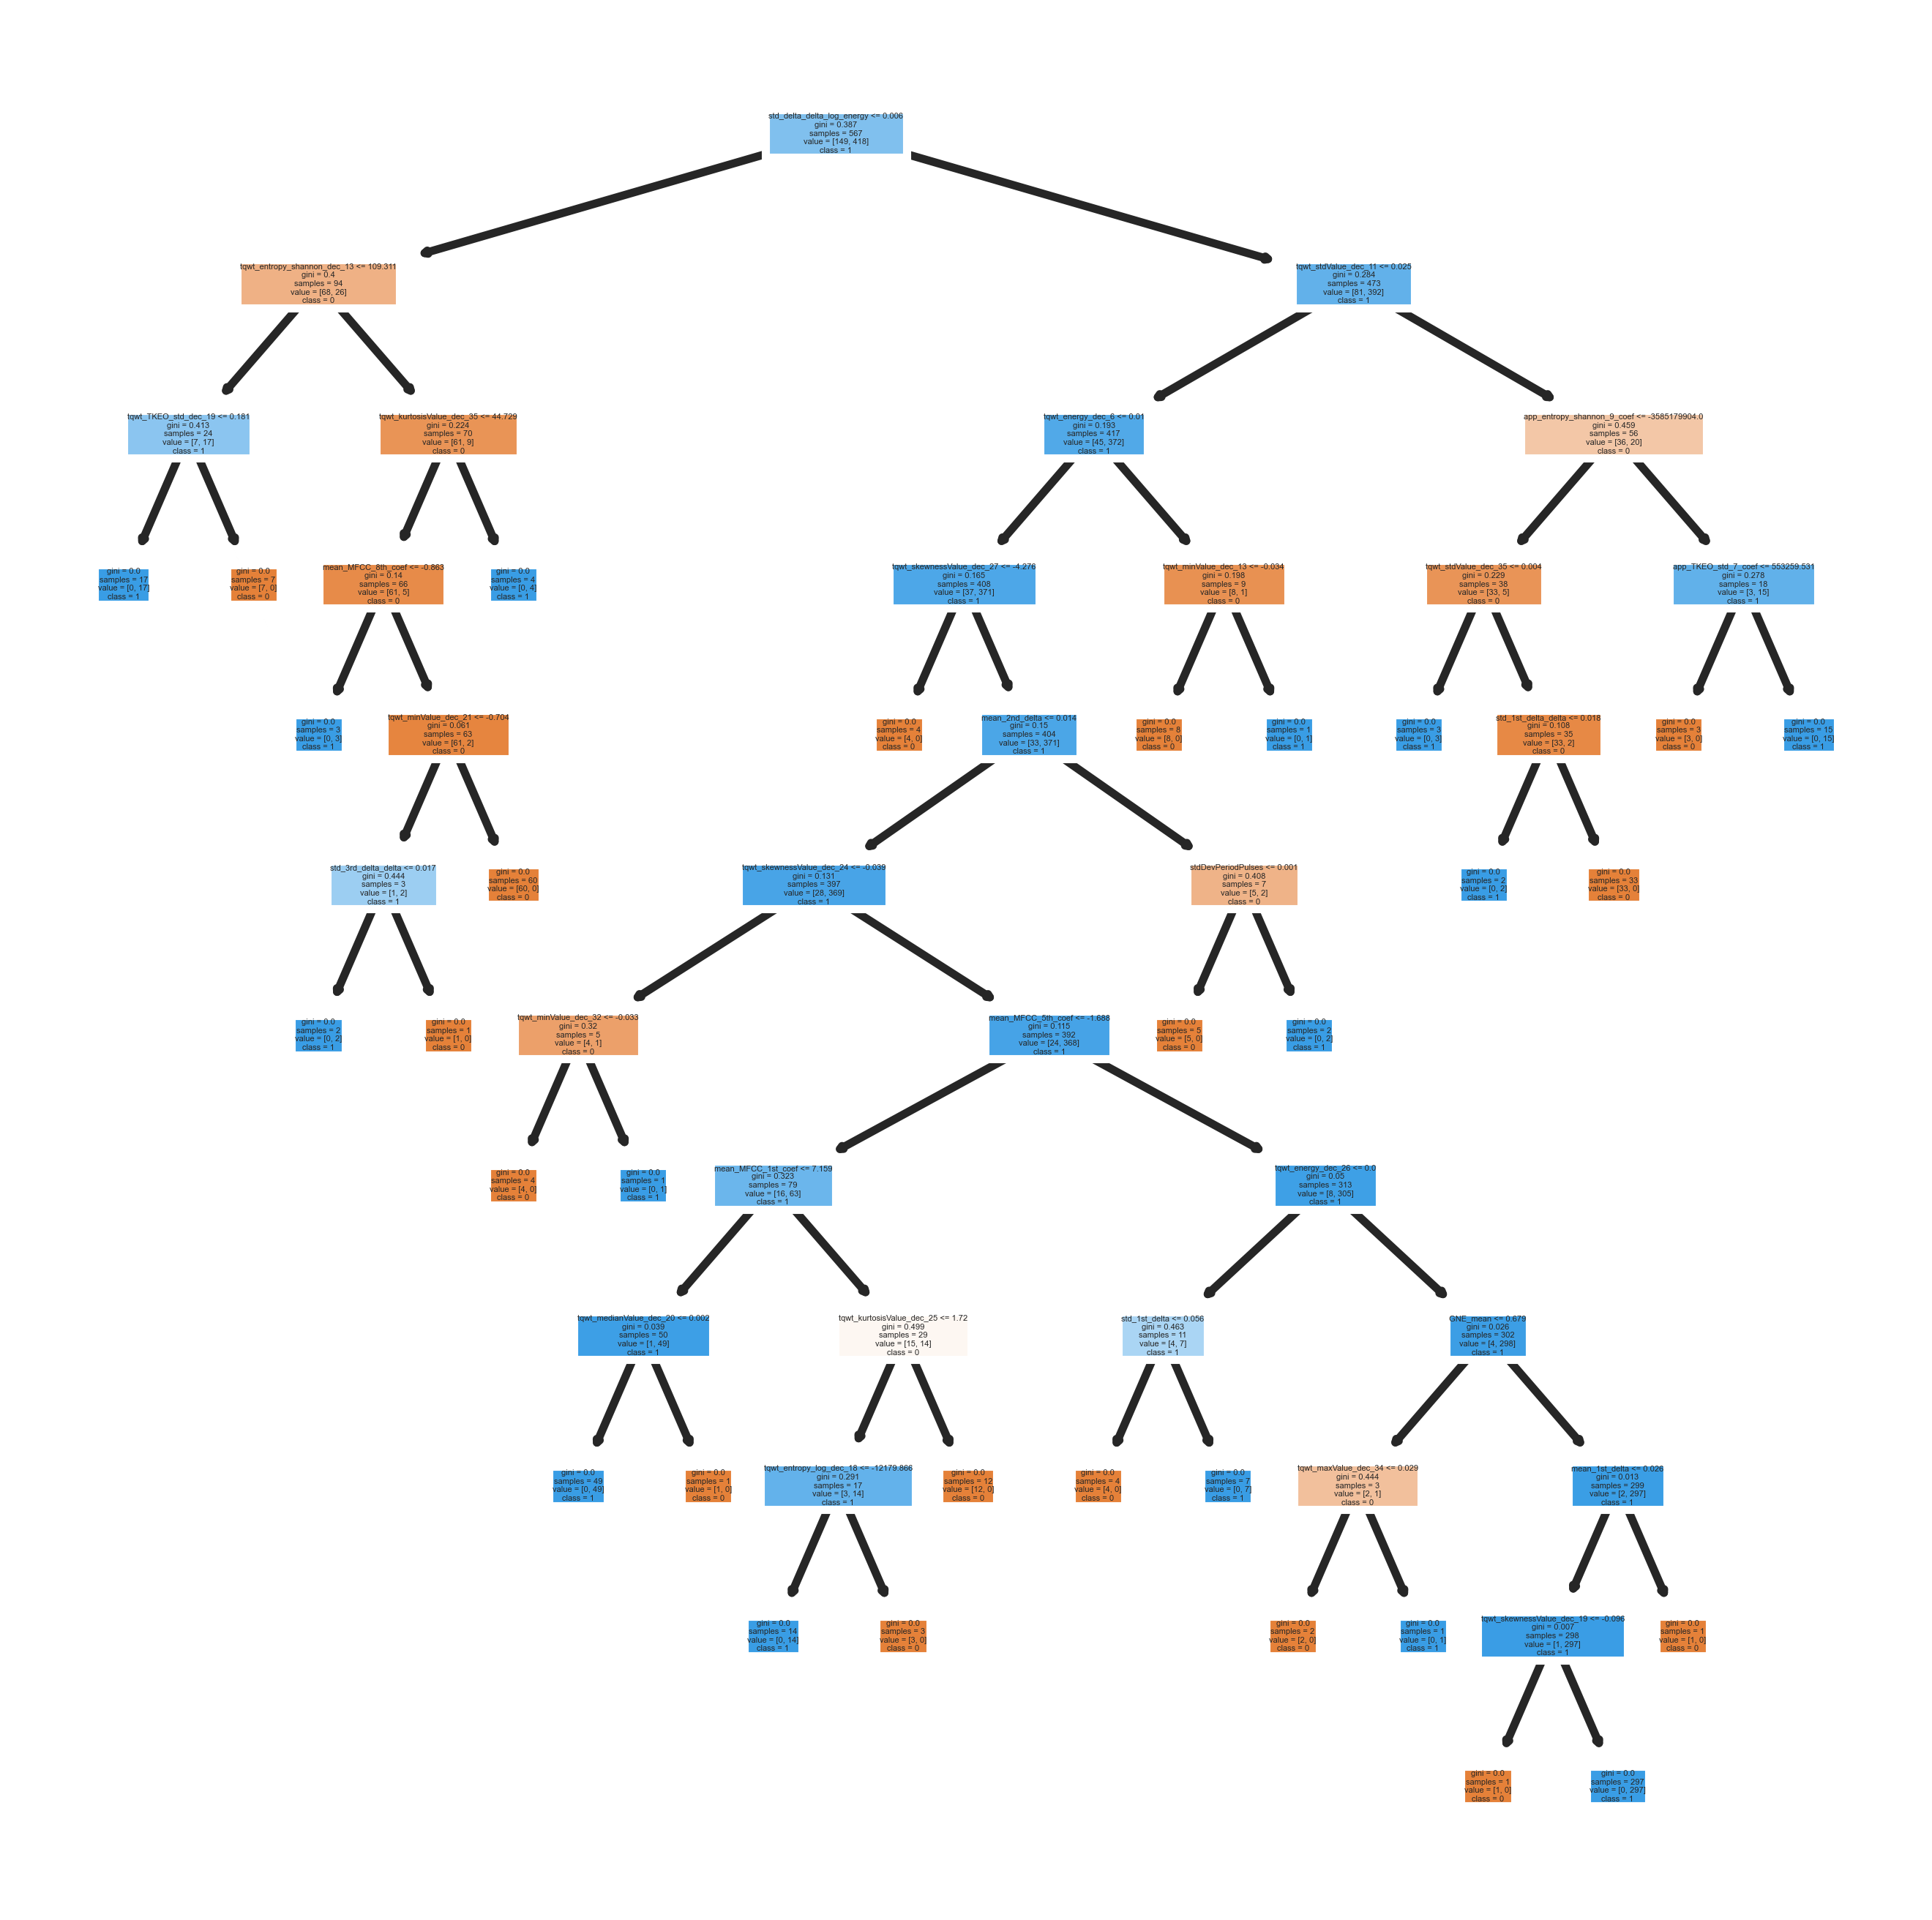

In [3]:

x = data.drop('class', axis=1).values
y = data['class']
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25)
print("Training number: ", train_x.shape[0])
print("Testing number: ", test_x.shape[0])

def makeDecisionTree(max_depth = None, min_samples_split = 2):
    model = DecisionTreeClassifier(max_depth =max_depth, min_samples_split=min_samples_split)
    model.fit(train_x, train_y)
    return model

depthDF = pd.DataFrame(columns=['depth', 'test_score'])
minSamplesSplitDF = pd.DataFrame(columns=['min_samples_split', 'test_score'])
for i in range(2, 10):
    modelDepth = makeDecisionTree(i, 2)
    minSamples = i * 3 # Например так, чтобы было наглядней
    modelMinSplit = makeDecisionTree(None, minSamples)
    newDepthDF = pd.DataFrame([{'depth': i, 'test_score': modelDepth.score(test_x, test_y)}])
    newMinSplitDF = pd.DataFrame([{'min_samples_split': minSamples, 'test_score': modelMinSplit.score(test_x, test_y)}])
    depthDF = pd.concat([depthDF, newDepthDF])
    minSamplesSplitDF = pd.concat([minSamplesSplitDF, newMinSplitDF])
print('\n', depthDF, '\n')
print('\n', minSamplesSplitDF, '\n')


features = data.drop('class', axis=1).columns
classes = ['0', '1']
print('Features: ', features)
print('Classes: ', classes)
plt.figure(figsize=(4, 4),dpi = 800)

modelForPlot = makeDecisionTree()
plot_tree(modelForPlot, feature_names = features, class_names = classes, filled = True)
plt.show()




## Задание 3

 - Построить модель RandomForest
 - Исследовать влияние гиперпараметров алгоритма на качество классификации:
    - число деревьев (n_estimators)
    - число отбираемых показателей (max_features)
    - построение полных\ограниченных деревьев (max_depth)
 - Для выбранной модели привести структуру 3 деревьев решений, участвующих в модели.

In [4]:
random_forest_classifier = RandomForestClassifier()

def makeRandomForestTree(max_depth, n_estimators, max_features):
    model = RandomForestClassifier(max_depth = max_depth, n_estimators=n_estimators, max_features = max_features)
    model.fit(train_x, train_y)
    return model


depthDF1 = pd.DataFrame(columns=['depth', 'test_score'])
nEstimatorsDF = pd.DataFrame(columns=['n_estimators', 'test_score'])
for i in range(2, 10):
    modelDepth = makeRandomForestTree(i, 100, "sqrt")
    nEstimators = i * 100 # Например так, чтобы было наглядней
    modelNEstimators = makeRandomForestTree(None, nEstimators, "sqrt")
    newDepthDF = pd.DataFrame([{'depth': i, 'test_score': modelDepth.score(test_x, test_y)}])
    newNEstimatorsDF = pd.DataFrame([{'n_estimators': nEstimators, 'test_score': modelNEstimators.score(test_x, test_y)}])
    depthDF1 = pd.concat([depthDF, newDepthDF])
    nEstimatorsDF = pd.concat([ nEstimatorsDF, newNEstimatorsDF])
print('\n', depthDF1, '\n')
print('\n', nEstimatorsDF, '\n')

featuresDF = pd.DataFrame(columns=['max_features', 'test_score'])
for val in ['sqrt', 'log2', None]: # None -> max_features = max_features
    modelFeatures = makeRandomForestTree(None, 100, val)
    newFeaturesDF = pd.DataFrame([{'max_features': val, 'test_score': modelFeatures.score(test_x, test_y)}])
    featuresDF = pd.concat([featuresDF, newFeaturesDF])
print('\n', featuresDF, '\n')





   depth  test_score
0     2    0.783069
0     3    0.788360
0     4    0.798942
0     5    0.798942
0     6    0.809524
0     7    0.793651
0     8    0.767196
0     9    0.756614
0     9    0.851852 


   n_estimators  test_score
0          200    0.857143
0          300    0.862434
0          400    0.888889
0          500    0.867725
0          600    0.867725
0          700    0.862434
0          800    0.857143
0          900    0.867725 


   max_features  test_score
0         sqrt    0.873016
0         log2    0.857143
0         None    0.857143 



3 дерева из леса:


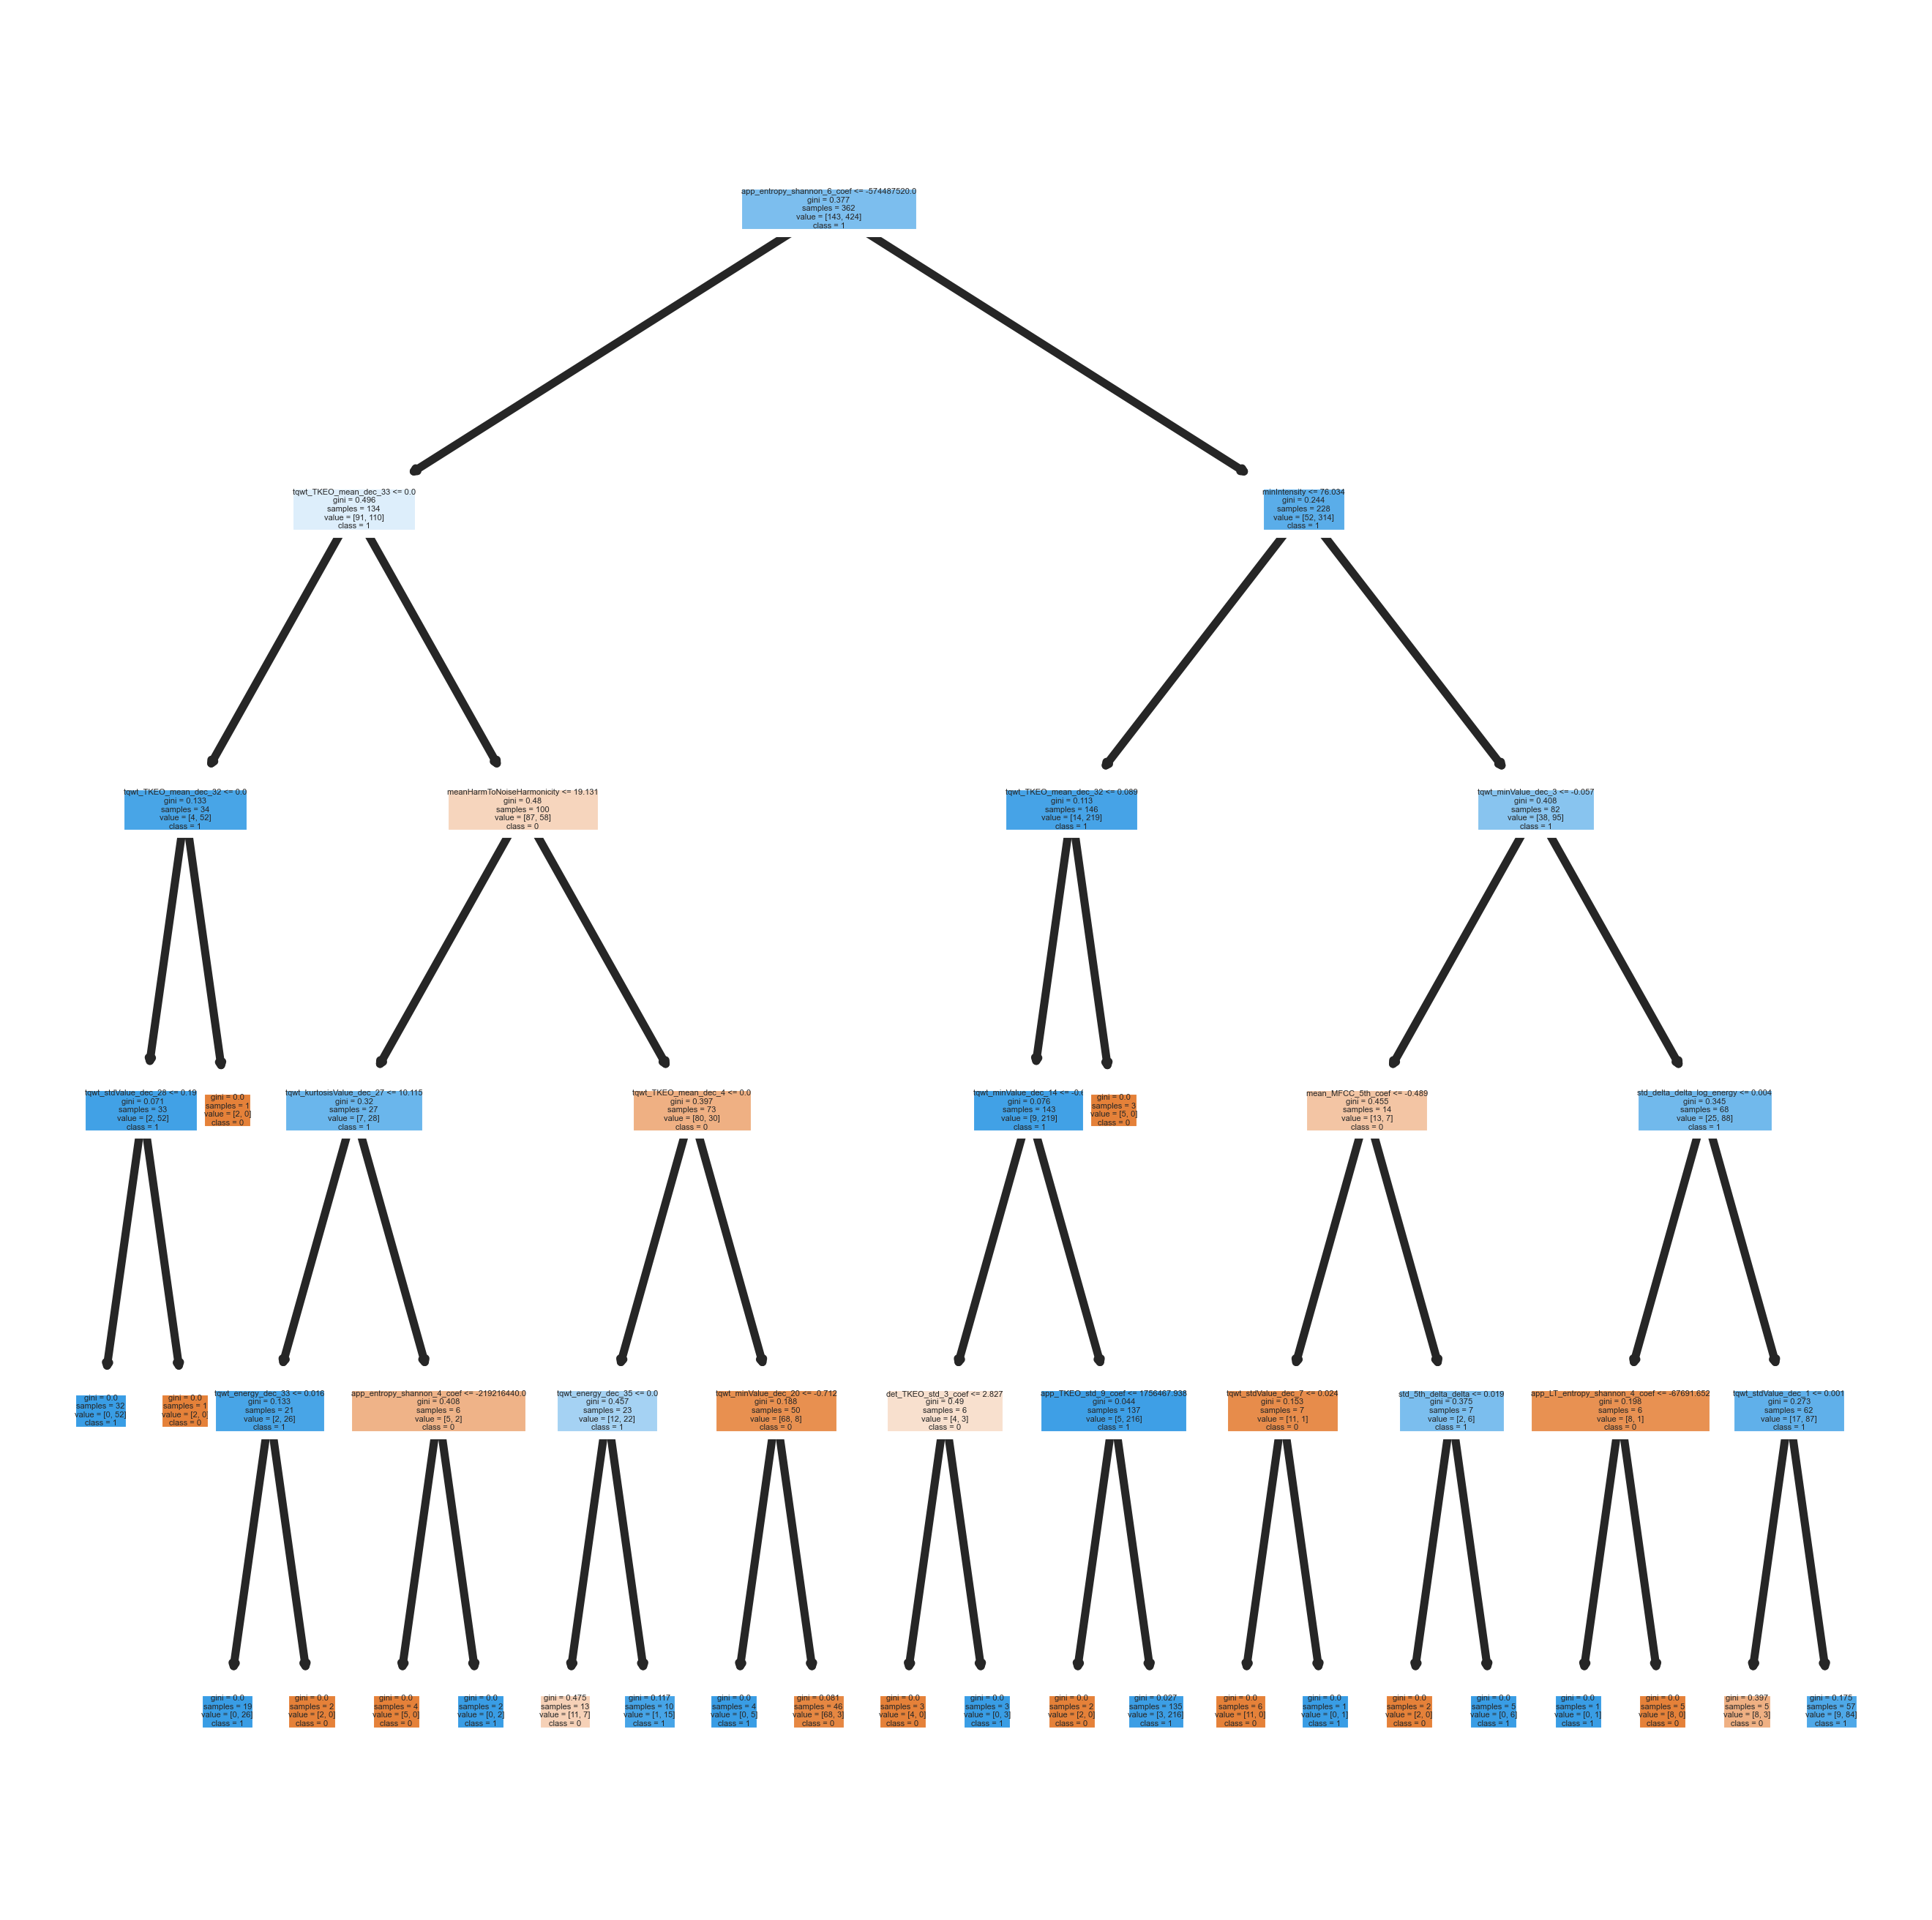

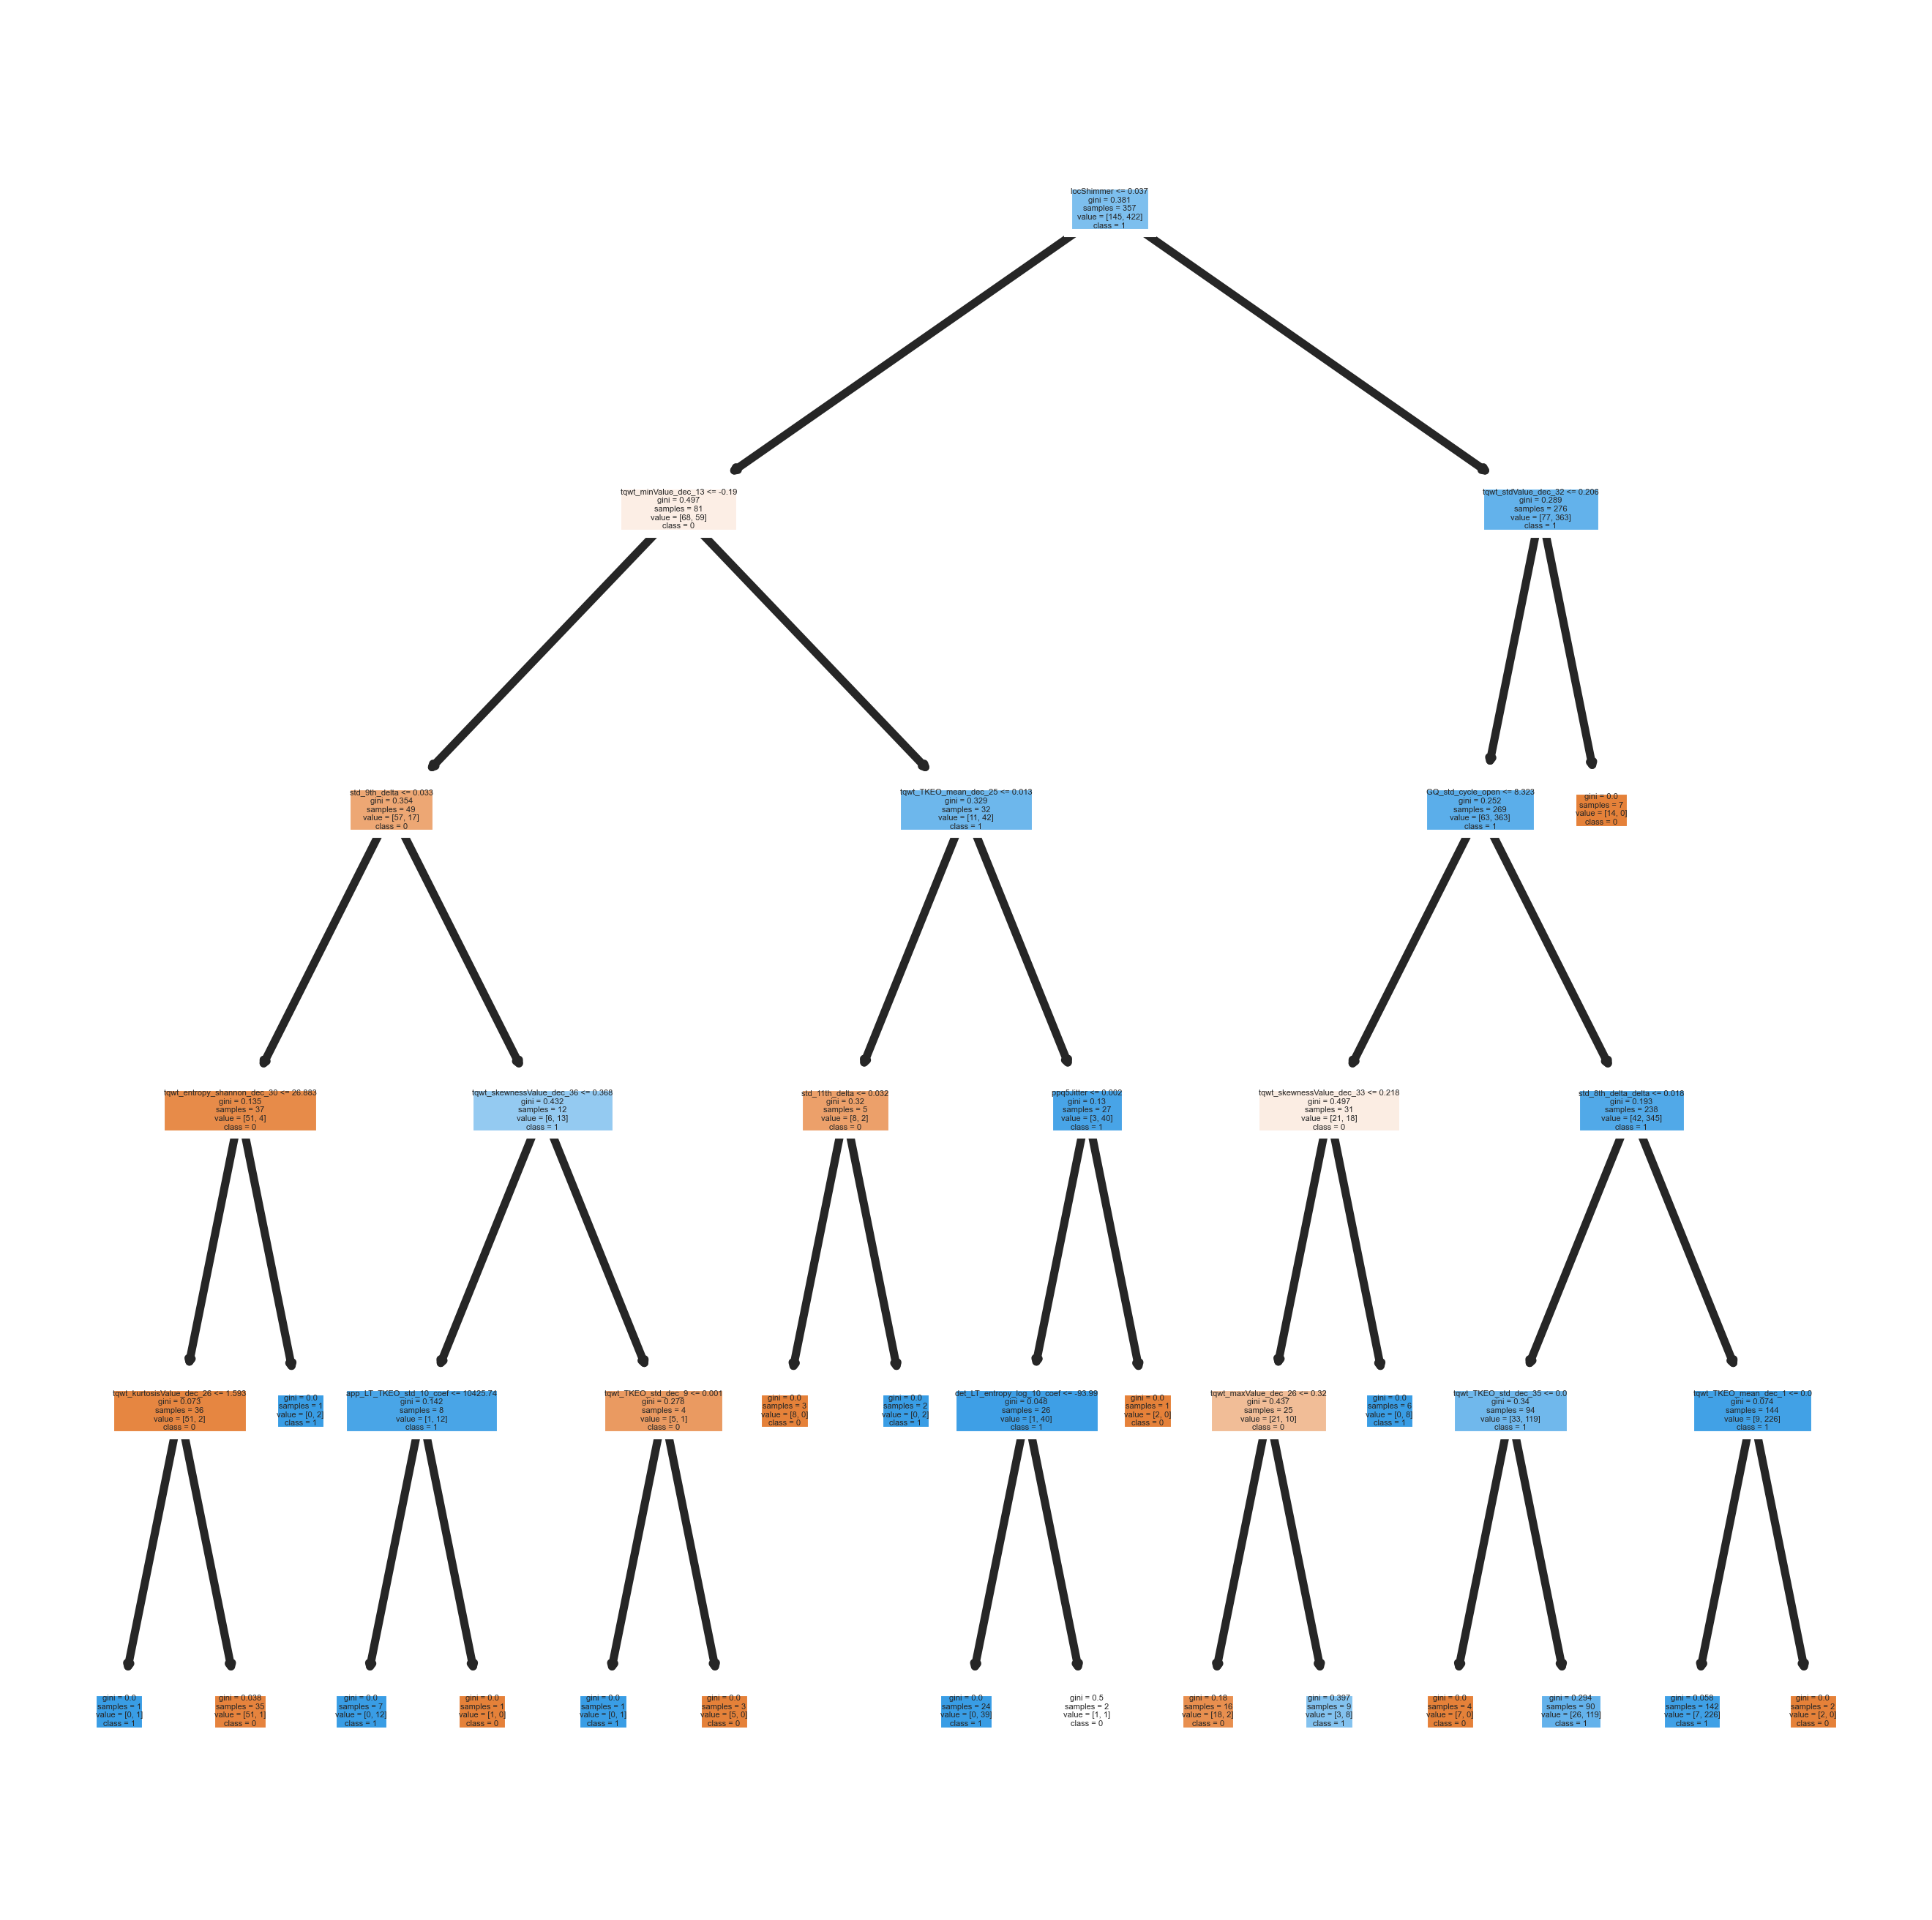

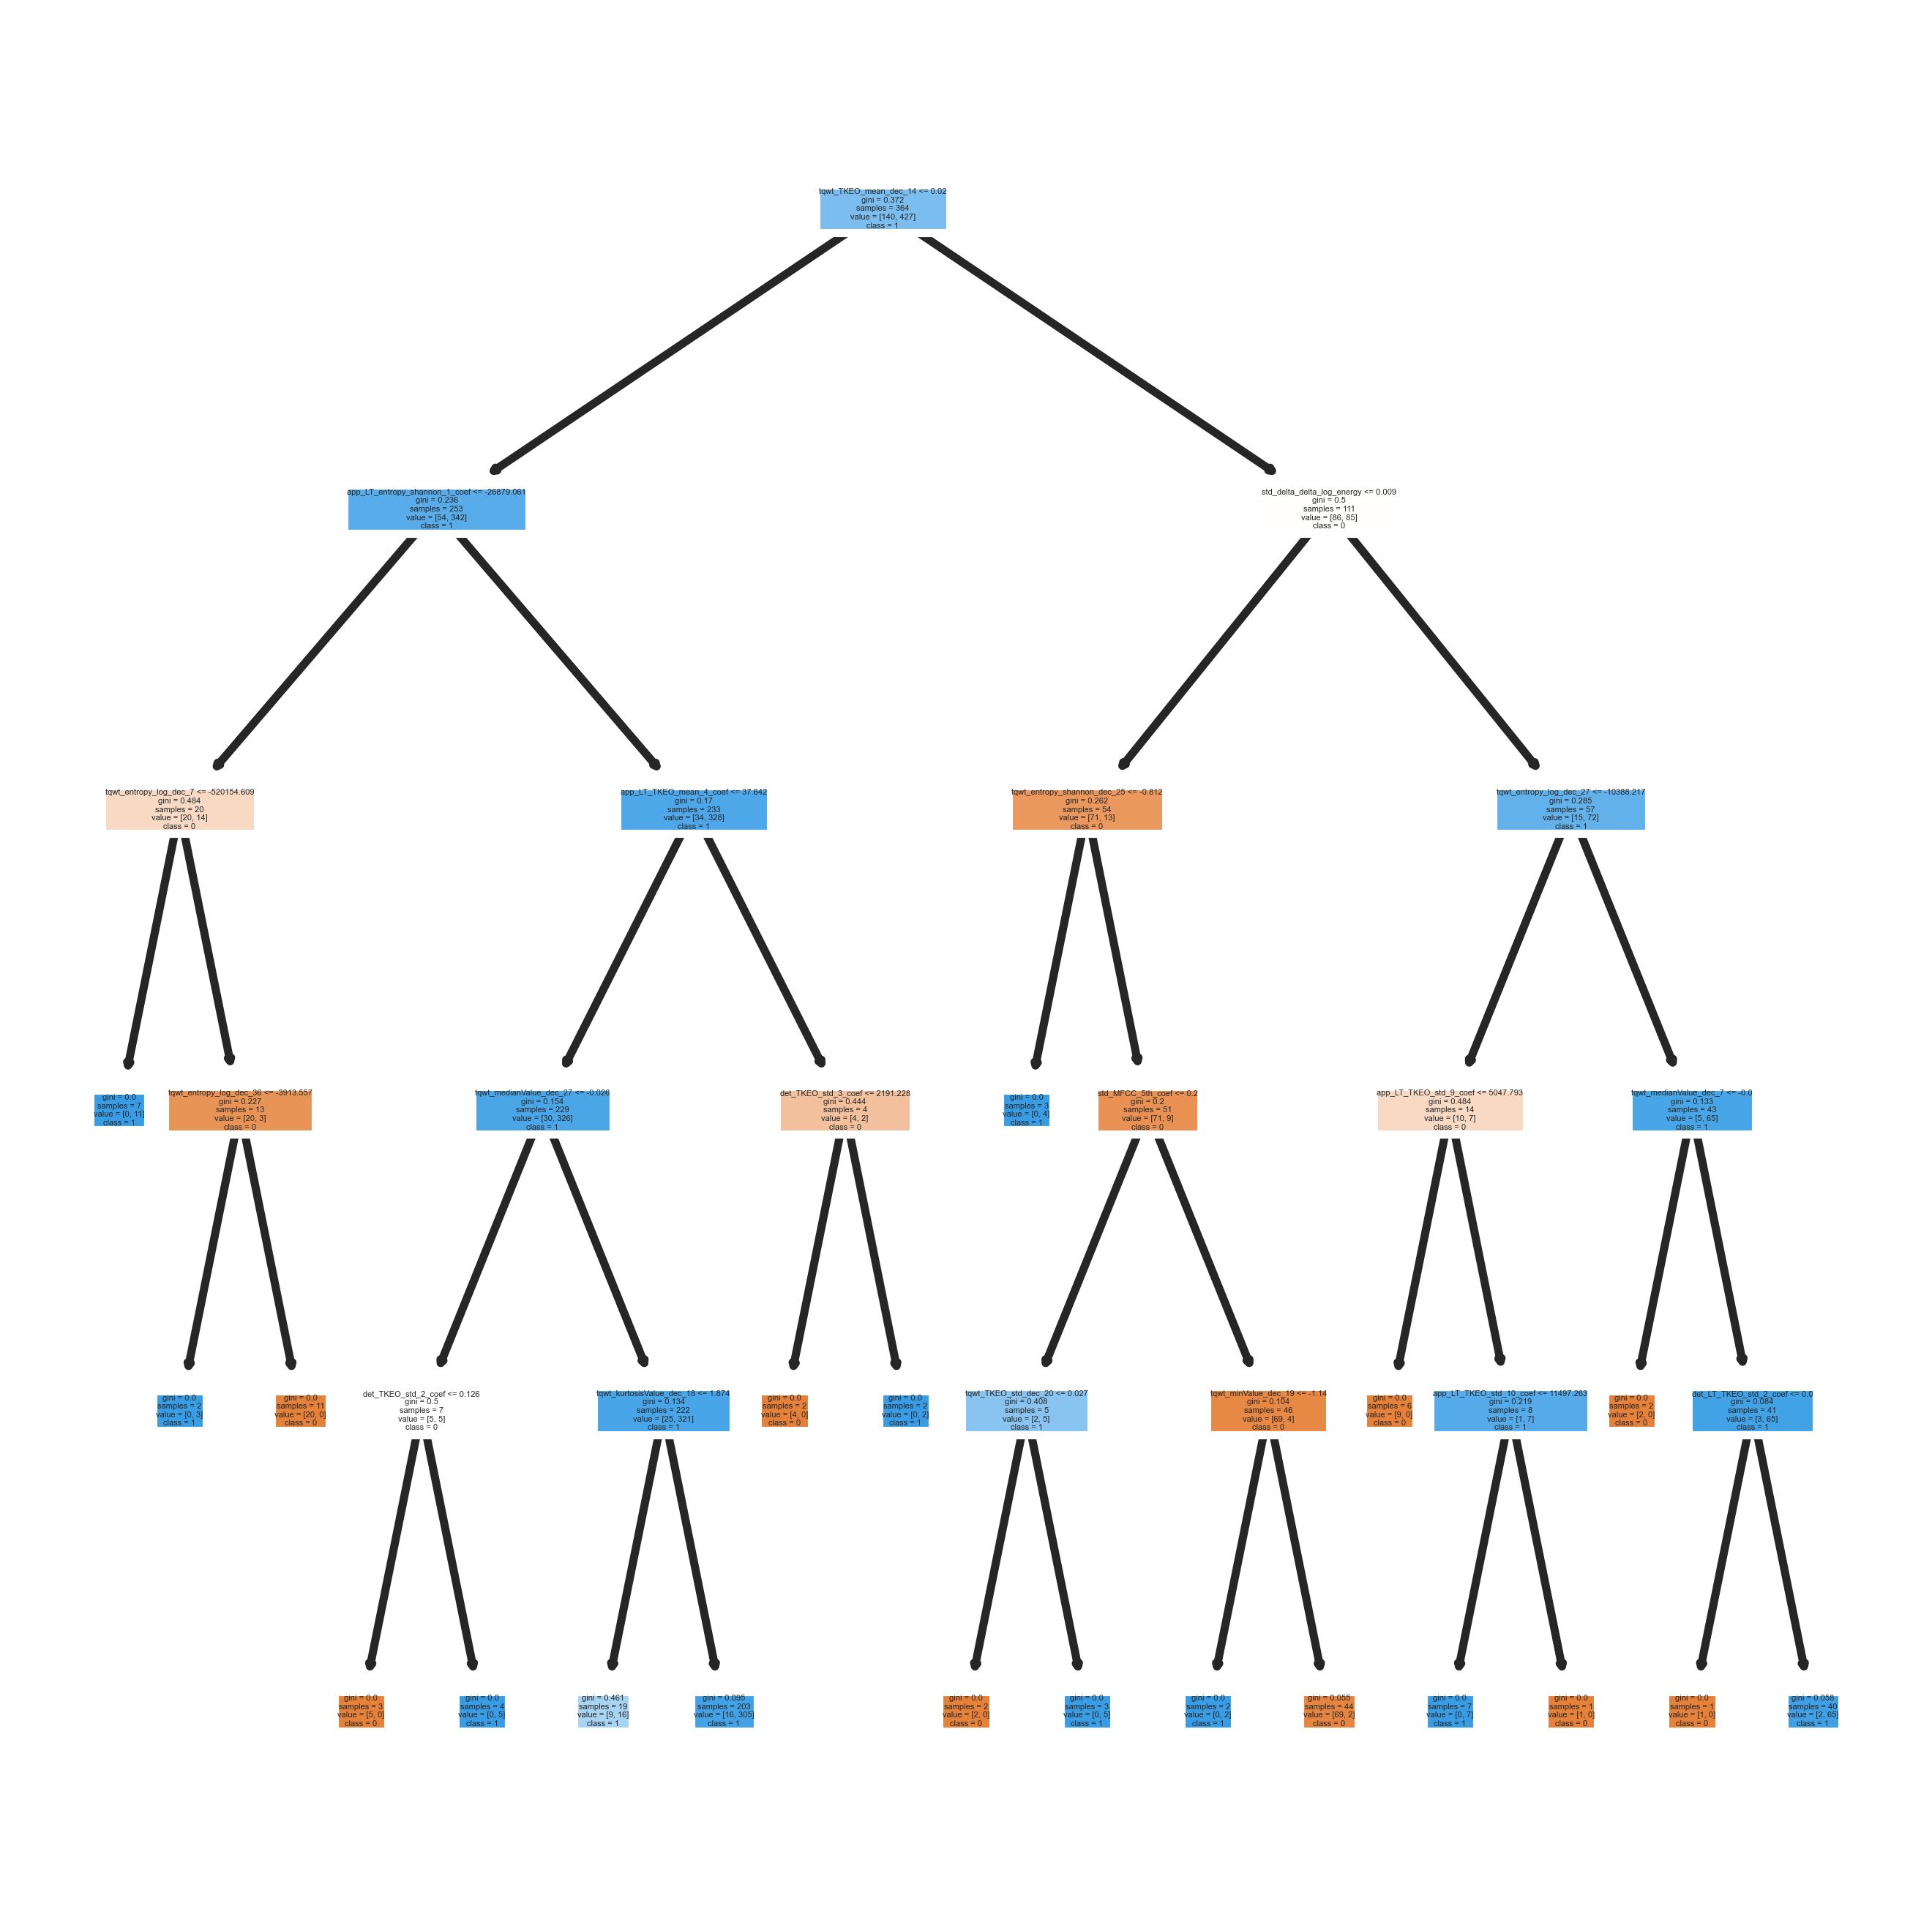

In [5]:
print('3 дерева из леса:')
randomForestForPlot = makeRandomForestTree(5, 100, 'sqrt')
for i in range(0, 3):
    plt.figure(figsize=(4, 4),dpi = 800)
    plot_tree(randomForestForPlot.estimators_[i], feature_names = features, class_names = classes, filled = True)
    plt.show()



## Задание 4

Получить оценки важности показателей с помощью модели RandomForest. Для трёх показателей с наибольшей оценкой важности привести диаграммы с группировкой по классу.

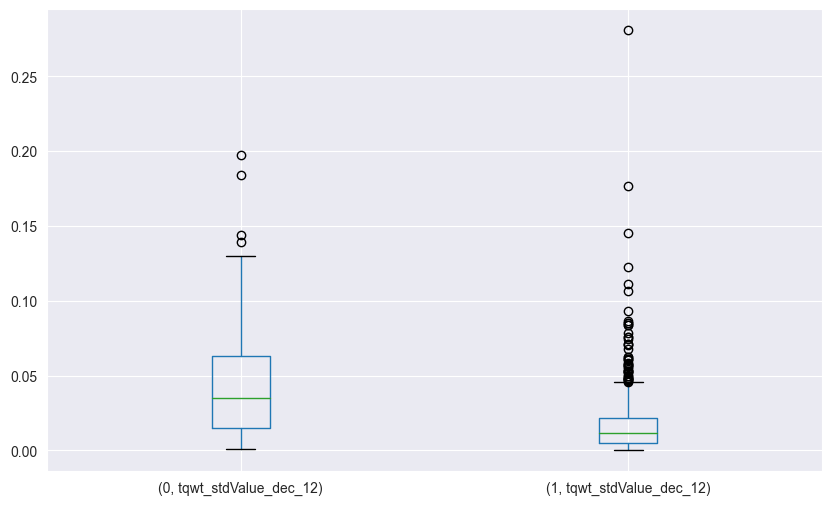

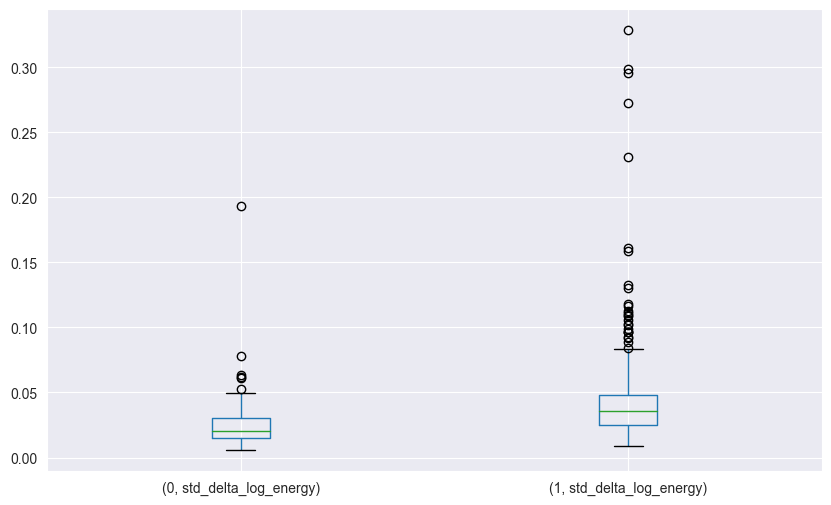

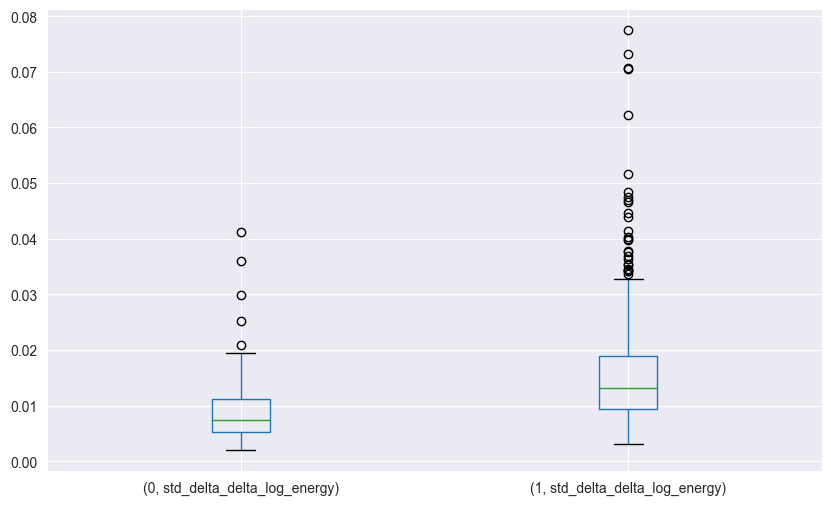

In [6]:

featureImportances = randomForestForPlot.feature_importances_
topFeaturesIndices = np.argsort(featureImportances)[-3:]
topFeaturesColumnNames = [data.columns[int(i)] for i in topFeaturesIndices]
topFeaturesColumnNamesWithClass =  topFeaturesColumnNames + ['class']
topFeaturesDF = data[topFeaturesColumnNamesWithClass]

for name in topFeaturesColumnNames:
    plt.figure(figsize=(10, 6))
    newPlotDF = topFeaturesDF[[name, 'class']]
    grouped = newPlotDF.groupby('class')
    plotDF = grouped[[name]]
    plotDF.boxplot(subplots=False)



## Задание 5

Построить три модели классификации одного типа (RandomForestClassifier):
 -  на полном наборе показателей;
 - на 20% показателей с наибольшими оценками важности;
 - на 80% показателей с наименьшими оценками важности.

In [8]:
fullModel = RandomForestClassifier()
fullModel.fit(train_x, train_y)
fullScore = fullModel.score(test_x, test_y)

percentile = 20
importantFeaturesIndices = np.argsort(featureImportances)[-int(percentile / 100 * len(featureImportances)):]
selected_x_train = train_x[:, importantFeaturesIndices]
selected_x_test = test_x[:, importantFeaturesIndices]

selectedModel = RandomForestClassifier()
selectedModel.fit(selected_x_train, train_y)
selectedScore = selectedModel.score(selected_x_test, test_y)

percentile = 80
unimportantFeaturesIndices = np.argsort(featureImportances)[:int(percentile / 100 * len(featureImportances)):]
removed_x_train = np.delete(train_x, unimportantFeaturesIndices, axis=1)
removed_x_test = np.delete(test_x, unimportantFeaturesIndices, axis=1)

removedModel = RandomForestClassifier()
removedModel.fit(removed_x_train, train_y)
removedScore = removedModel.score(removed_x_test, test_y)

results = pd.DataFrame({'Model Type': ['Full Features', 'Top 20% Important Features', 'Bottom 80% Unimportant Features'],
                        'Score': [fullScore, selectedScore, removedScore]})
results

,Model Type,Score
0,Full Features,0.878307
1,Top 20% Important Features,0.835979
2,Bottom 80% Unimportant Features,0.846561


## Задание 6
Провести дополнительный анализ коллективных древовидных моделей на базе
«бустинга» (последовательного улучшения): AdaBoostClassifie

In [10]:
adaBoostClassifier = AdaBoostClassifier()
adaBoostClassifier.fit(train_x, train_y)
adaBoostScore = adaBoostClassifier.score(test_x, test_y)
print('AdaBoostClassifier score:', adaBoostScore)

AdaBoostClassifier score: 0.8201058201058201
